In [13]:
import pandas as pd
import plotly.express as px
import random
import seaborn as sns

In [2]:
def downsampling():
    sampled_list = []
    n = 0
    while n <= 3:
        print(n)
        p = 0.01  # 1% of the lines
        # keep the header, then take only 1% of lines
        # if random from [0,1] interval is greater than 0.01 the row will be skipped
        df = pd.read_csv('riders_cleaned.csv.gz', skiprows=lambda i: i>0 and random.random() > p,
                         parse_dates = ['starttime', 'stoptime'],\
                         dtype = {'start station id': 'Int32', 'end station id': 'Int32'})
        df = df.drop(['Unnamed: 0', 'index'], axis = 1)
        df['Sample_num'] = n
        sampled_list.append(df)
        n += 1
    return pd.concat(sampled_list)

In [3]:
sample_df = downsampling()

0


/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


1
2
3


In [14]:
sample_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station latitude',
       'start station longitude', 'end station latitude',
       'end station longitude', 'year', 'start_date', 'stop_date',
       'start_hour', 'stop_hour', 'start_min', 'stop_min', 'season',
       'dayofweek', 'start_interval', 'stop_interval', 'Sample_num'],
      dtype='object')

In [12]:
sample_df = sample_df.drop(['start station id',
       'start station name','end station id', 'end station name','bikeid', 'usertype',
       'birth year', 'gender'], axis = 1)

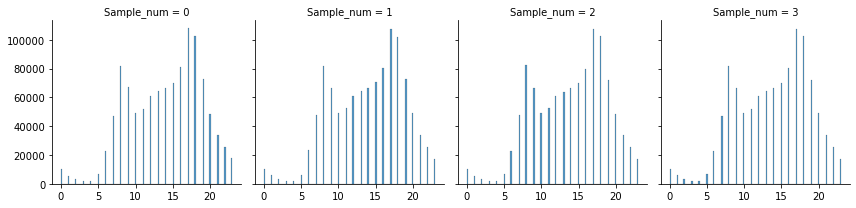

In [17]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='start_hour')

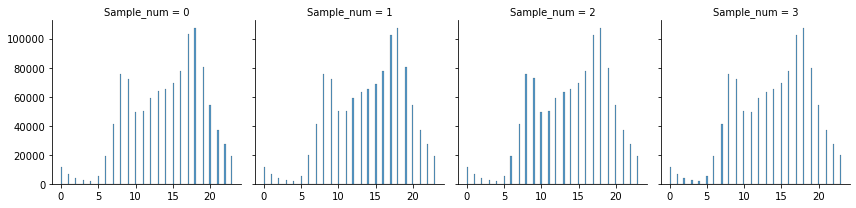

In [18]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='stop_hour') 

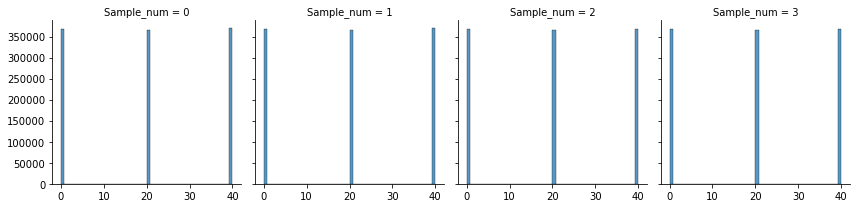

In [19]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='start_min')

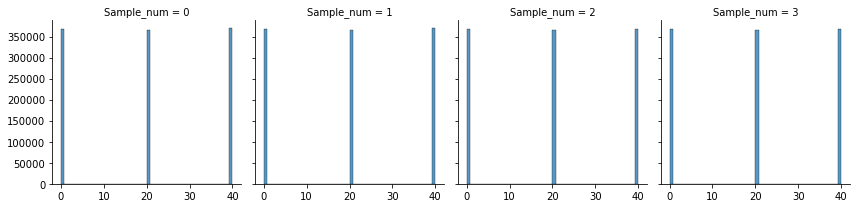

In [20]:
g = sns.FacetGrid(sample_df, col="Sample_num")
g.map_dataframe(sns.histplot, x='stop_min')